# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'to_daily': False,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250207.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [9]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [10]:
WidgetUniverse

## K200

In [12]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-02-12 uploaded.
Price data loaded


In [13]:
#k200.portfolio_data
#k200.get_names()

In [14]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-02-13 downloaded.
kospi200_prices_250213.csv saved
df_prices updated
Execution time of download: 27.87 secs


## KRX

In [32]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [15]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-02-12 uploaded.
Price data loaded


In [16]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [17]:
#PM.review_universe('UV_WTR')

In [18]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-02-13 downloaded.
etfs_weather_250213.csv saved
df_prices updated
Execution time of download: 0.54 secs


In [19]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [40]:
fund = PM.create_universe('UV_FUND')

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [15]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite_master=False
)
fund.download(**kw) if WidgetUniverse.values(0) else None

100%|█████████████████████████████████████████████████████████████| 160/160 [00:23<00:00,  6.95it/s]


23.0 secs elapsed, 0.4 secs paused (1.7%)


100%|█████████████████████████████████████████████████████████████| 160/160 [00:12<00:00, 12.94it/s]


12.4 secs elapsed, 0.2 secs paused (1.6%)
funds_info_250207.csv saved
224 tickers set to download


100%|█████████████████████████████████████████████████████████████| 224/224 [00:26<00:00,  8.41it/s]


26.7 secs elapsed, 0.5 secs paused (1.9%)
Max error of conversions: 1.16e-02
... done
224 securities from 2005-01-31 to 2025-01-31 downloaded.
funds_prices_250131.csv saved
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
df_prices updated
Execution time of download: 64.68 secs


In [8]:
#_ = fund.save()

funds_prices_250131.csv saved


In [16]:
#fund.portfolio_data['universe']

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [24]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded


In [35]:
import random
#tickers = [k for k,v in fund.security_names.items() if 'TDF2045' in v]
tickers = random.sample(list(fund.security_names.keys()), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
fund.get_names(tickers)

0) K55232C70460: NH-Amundi글로벌혁신기업증권자투자신탁(UH)[주식]ClassC-P1e
1) K55301CQ5219: 미래에셋친디아컨슈머증권투자신탁 1(주식)종류C-Pe
2) K55307BC6945: 유리베트남알파연금저축증권자투자신탁[주식]_C/C-e

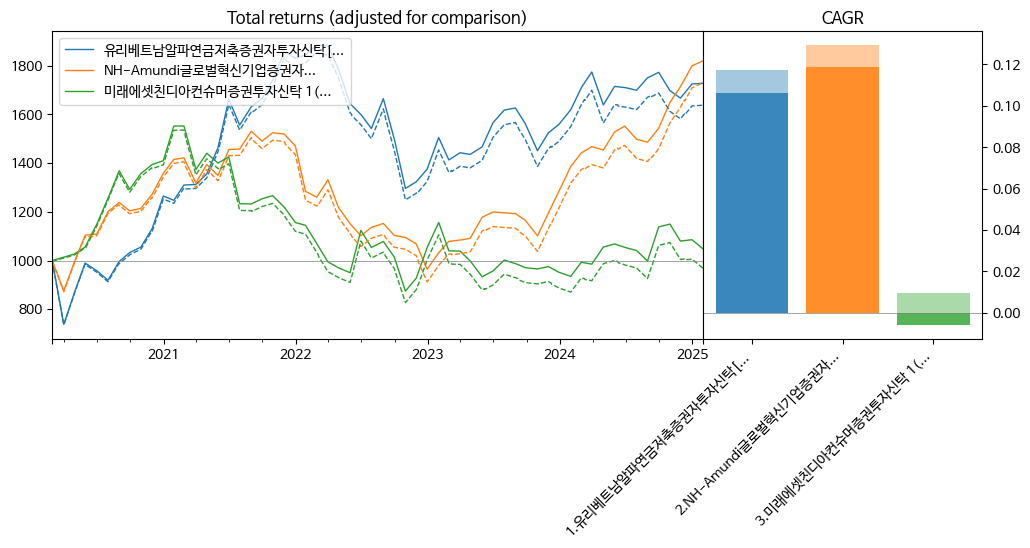

In [36]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [20]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [21]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-02-12 uploaded.
Price data loaded


In [22]:
#liq.get_names()

In [23]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.09it/s]

1.3 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-02-13 downloaded.
krx_liq_prices_250213.csv saved
df_prices updated
Execution time of download: 1.96 secs


## Additional Data

### Cost

*Check missing cost data*

In [23]:
_ = PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_250207.csv loaded
224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [23]:
fd = FundDownloader.create(fund)
#fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
fd.export_cost('UV_FUND')

Data for 224 funds loaded.
Cost data transaction_cost_241217.csv loaded
Cost data saved to transaction_cost_250207.csv


### Financial Ratio

In [23]:
WidgetUniverse

In [24]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [25]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [13:12<00:00,  3.96s/it]


13.2 mins elapsed, 30.0 secs paused (3.8%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 downloaded
kospi200_ratios_250203.csv saved


In [26]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [27]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-02-03
Price: 2022-01-03 ~ 2025-02-03


# Performance

In [24]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [25]:
pf_list = ['MMT_2407', 'PER_2410', 'WTR_2407', 'WTR_2412']
pm = PM(pf_list)

MMT_2407:
200 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Transaction record to 2025-01-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Transaction record to 2024-11-20 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Transaction record to 2024-12-18 loaded



In [6]:
#pm.load('LIQ')
pm.load(['TDF_2406','HANA_2408'])

TDF_2406:
64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2025-01-15 loaded

HANA_2408:
64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-08-01 loaded



security_names updated
Data of tickers 009900, 016380 downloaded


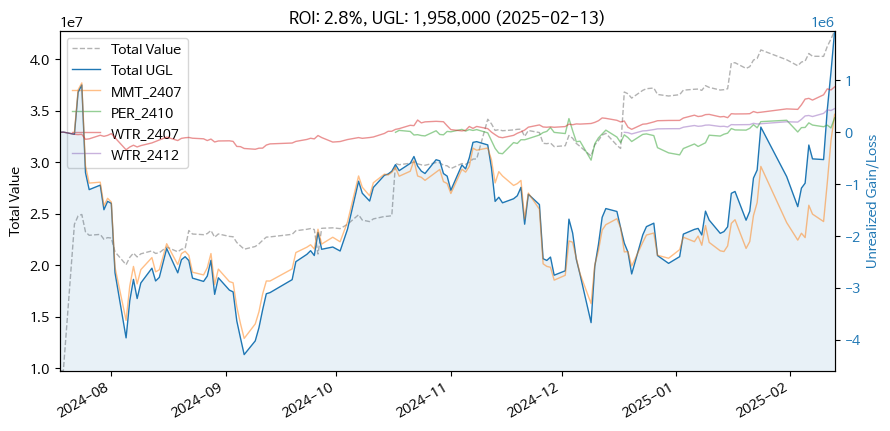

In [26]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [27]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [28]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-07-18
end,2025-02-13,2025-02-13,2025-02-13,2025-02-13,2025-02-13
buy,"42,593,500","12,249,820","10,049,835","5,783,200","70,676,355"
sell,"26,824,951","2,621,865","437,755",0.0,"29,884,571"
value,"16,115,000","9,907,080","10,488,637","6,239,532","42,750,249"
ugl,"346,451","279,125","876,557","456,332","1,958,465"
roi,0.008134,0.022786,0.087221,0.078906,0.02771


*print summary for google sheet 금융자산운용*

In [10]:
pm.util_print_summary(date=w_date.value)

2025-02-03, MMT, 2407, , , , 평가, , 42593500, 26824951, 13688500, -2080049, -0.048834892647939276
2025-02-03, PER, 2410, , , , 평가, , 12249820, 2621865, 9634330, 6375, 0.0005204158101914658
2025-02-03, WTR, 2407, , , , 평가, , 10049835, 437755, 10054403, 442323, 0.044012961406828977
2025-02-03, WTR, 2412, , , , 평가, , 5783200, 0.0, 5980459, 197259, 0.034108970812007255
2025-01-31, TDF, 2406, , , , 평가, , 35000000, 0.0, 35010787, 10787, 0.00030820000000009173
2025-01-31, HANA, 2408, , , , 평가, , 9990000, 0.0, 10194581, 204581, 0.0204785785785786


# Transaction

## MMT

In [4]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-01-16 loaded


In [5]:
# run after editting record file
pf_mmt.update_record()

In [6]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2024-12-16 267260     HD현대일렉트릭  0.975610      -389500  2726500     0.2   
           010130         고려아연  1.000858      2330000  2330000     0.2   
           003230         삼양식품  1.000000     -1458000  2187000     0.2   
           000150           두산  0.963303      2725000  2725000     0.2   
           298040        효성중공업  0.985808      2290000  2290000     0.2   
           012450    한화에어로스페이스  1.040650     -2152501        0     0.0   
           064350         현대로템  1.026943     -2316000        0     0.0   
           079550       LIG넥스원  1.004130     -2130700        0     0.0   
2025-01-16 267260     HD현대일렉트릭  1.000000            0  2922500     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           000150           두산  1.000000            0  2880000     0.2   
           012450    한화에어로스페이스  1.031414      2673999  2674000     0.2   
           010120  LS ELECTRIC  0.899535      3225000  3225000     0.2   
           010130         고려아연  0.957796     -1706000        0     0.0   
           298040        효성중공업  0.997872     -2350000        0     0.0   

                   weight*      date*  
date       ticker                      
2024-12-16 267260    0.222 2024-12-17  
           010130    0.190 2024-12-17  
           003230    0.178 2024-12-17  
           000150    0.222 2024-12-17  
           298040    0.187 2024-12-17  
           012450    0.000 2024-12-17  
           064350    0.000 2024-12-17  
           079550    0.000 2024-12-17  
2025-01-16 267260    0.209 2025-01-17  
           003230    0.165 2025-01-17  
           000150    0.206 2025-01-17  
           012450    0.191 2025-01-17  
           010120    0.230 2025-01-17  
           010130    0.000 2025-01-17  
           298040    0.000 2025-01-17

*daily transactions for book keeping*

In [7]:
pf_mmt.get_cash_history(cumsum=False, date_actual=True)

,buy,sell
date*,,
2024-07-22,14255518,0
2024-08-22,6159324,4321649
2024-09-26,0,2819812
2024-09-27,2825103,0
2024-10-08,3072111,3348589
2024-11-11,3038510,3805898
2024-12-17,7345267,8431189
2025-01-17,5899213,4048551


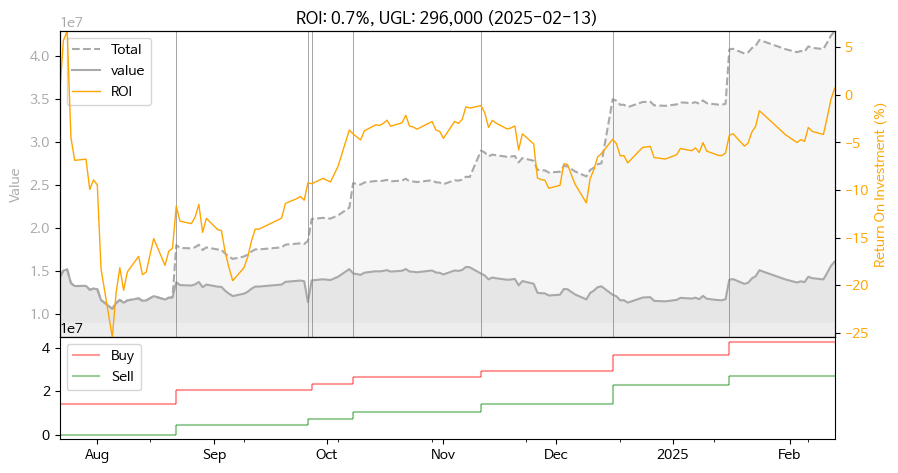

In [8]:
pf_mmt.plot()

In [10]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-02-13, 42595050, 26775690, 16115000, 295640, 0.0069407016223725915


start    2024-07-22
end      2025-02-13
buy      42,595,050
sell     26,775,690
value    16,115,000
ugl         295,640
roi        0.006941
dtype: object

*ROI of held assets*

In [11]:
pf_mmt.valuate(date, total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
012450,한화에어로스페이스,2024-08-22,2025-02-13,"8,042,584","5,773,878","3,612,000","1,343,295",0.167023
003230,삼양식품,2024-07-22,2025-02-13,"3,694,134","2,017,289","2,409,000","732,154",0.198194
267260,HD현대일렉트릭,2024-07-22,2025-02-13,"2,826,103","706,201","2,849,000","729,098",0.257987
010120,LS ELECTRIC,2024-07-22,2025-02-13,"5,889,214","2,088,957","3,945,000","144,742",0.024578
298040,효성중공업,2024-12-16,2025-01-16,"2,290,083","2,345,684",0.0,"55,601",0.024279
000150,두산,2024-07-22,2025-02-13,"5,325,194","1,915,276","3,300,000","-109,917",-0.020641
010130,고려아연,2024-12-16,2025-01-16,"2,330,085","1,702,867",0.0,"-627,218",-0.269182


In [12]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [17]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-02-13
Set save=True to save transaction record
ROI: 0.7%, UGL: 295,640 (2025-02-13)


In [15]:
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-02-06 to 2025-02-06
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
ROI: 0.6%, UGL: 286,815 (2025-02-13)
Set save=True to save transaction record


In [18]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2025-01-16 000150           두산  1.000000            0  2880000     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           010120  LS ELECTRIC  0.899535      3225000  3225000     0.2   
           010130         고려아연  0.957796     -1706000        0     0.0   
           012450    한화에어로스페이스  1.031414      2673999  2674000     0.2   
           267260     HD현대일렉트릭  1.000000            0  2922500     0.2   
           298040        효성중공업  0.997872     -2350000        0     0.0   
2025-02-13 000150           두산  1.000000            0  3300000     0.2   
           003230         삼양식품  1.000000            0  2409000     0.2   
           010120  LS ELECTRIC  1.000000            0  3945000     0.2   
           012450    한화에어로스페이스  1.000000            0  3612000     0.2   
           267260     HD현대일렉트릭  1.000000            0  2849000     0.2   

                   weight*      date*  
date       ticker                      
2025-01-16 000150    0.206 2025-01-17  
           003230    0.165 2025-01-17  
           010120    0.230 2025-01-17  
           010130    0.000 2025-01-17  
           012450    0.191 2025-01-17  
           267260    0.209 2025-01-17  
           298040    0.000 2025-01-17  
2025-02-13 000150    0.205 2025-02-13  
           003230    0.149 2025-02-13  
           010120    0.245 2025-02-13  
           012450    0.224 2025-02-13  
           267260    0.177 2025-02-13

## KRX
*simulation*

In [48]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [20]:
pf_krx.view_record(-2)

No transaction record imported


In [21]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [48]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 loaded


In [49]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [50]:
tickers_liq = pf_per.check_universe()

In [51]:
#pf_per.view_record(-2)

In [52]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-02-13, 12250266, 2617050, 9907080, 273864, 0.022355790203266723


start    2024-10-17
end      2025-02-13
buy      12,250,266
sell      2,617,050
value     9,907,080
ugl         273,864
roi        0.022356
dtype: object

In [53]:
#pf_per.update_record()
#pf_per.view_record(-2)

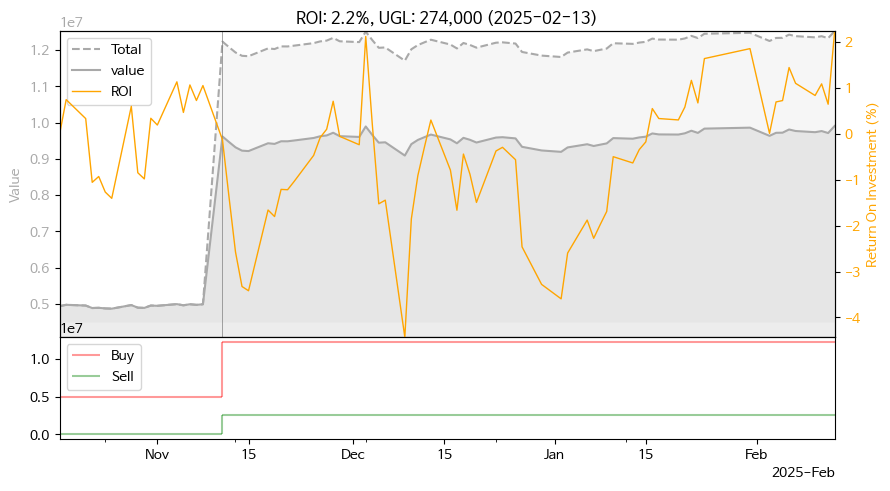

In [54]:
pf_per.plot()

In [47]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [48]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [49]:
kw = dict(
    #sell = tickers_liq,
    halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_per.transaction_halt(**kw) 
#pf_per.view_record(-1)

Trading of assets 009900, 016380 to halt
Updated with transaction on 2025-02-12
Set save=True to save transaction record
ROI: -0.1%, UGL: -13,457 (2025-02-12)


In [52]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2024-12-02 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
Tickers 009900, 016380 added to universe
ROI: 2.0%, UGL: 295,291 (2025-02-12)
Set save=True to save transaction record


In [53]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-01-31 000270       기아  102000           -1    4    0.05    0.043   
           001450     현대해상   24750            2   19    0.05    0.050   
           003030   세아제강지주  205000            0    2    0.05    0.044   
           005380      현대차  206000            0    2    0.05    0.044   
           005830   DB손해보험   97100            1    5    0.05    0.052   
           005850      에스엘   32050           -1   15    0.05    0.051   
           009900     명신산업    1000         -500    0    0.00    0.000   
           009970  영원무역홀딩스   81900            1    6    0.05    0.052   
           010060   OCI홀딩스   79100           -2    6    0.05    0.050   
           016380     KG스틸    1013         -494    0    0.00    0.000   
           017800   현대엘리베이   53000           -9    0    0.00    0.000   
           024110     기업은행   15530           -4   31    0.05    0.051   
           028050    삼성E&A   18010           27   27    0.05    0.052   
           047040     대우건설    3375            6  146    0.05    0.052   
           069260   TKG휴켐스   16950           29   29    0.05    0.052   
           078930       GS   38500            0   12    0.05    0.049   
           088350     한화생명    2495           17  197    0.05    0.052   
           105630     한세실업   13150           37   37    0.05    0.052   
           111770     영원무역   43950           -1   11    0.05    0.051   
           138930  BNK금융지주   12160          -55    0    0.00    0.000   
           139130  DGB금융지주    9220          -10   53    0.05    0.052   
           241560     두산밥캣   48050           -3   10    0.05    0.051   
           316140   우리금융지주   16100           -2   30    0.05    0.051   
           383220      F&F   64300            7    7    0.05    0.048   

                       date*  
date       ticker             
2025-01-31 000270 2025-01-31  
           001450 2025-01-31  
           003030 2025-01-31  
           005380 2025-01-31  
           005830 2025-01-31  
           005850 2025-01-31  
           009900 2025-01-31  
           009970 2025-01-31  
           010060 2025-01-31  
           016380 2025-01-31  
           017800 2025-01-31  
           024110 2025-01-31  
           028050 2025-01-31  
           047040 2025-01-31  
           069260 2025-01-31  
           078930 2025-01-31  
           088350 2025-01-31  
           105630 2025-01-31  
           111770 2025-01-31  
           138930 2025-01-31  
           139130 2025-01-31  
           241560 2025-01-31  
           316140 2025-01-31  
           383220 2025-01-31

In [54]:
#pf_per.update_record()

## WTR
*modified all weather*

In [4]:
pf = 'WTR_2407'
#pf = 'WTR_2412' # 배현정
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-02-13 loaded


In [5]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [6]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32902            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14

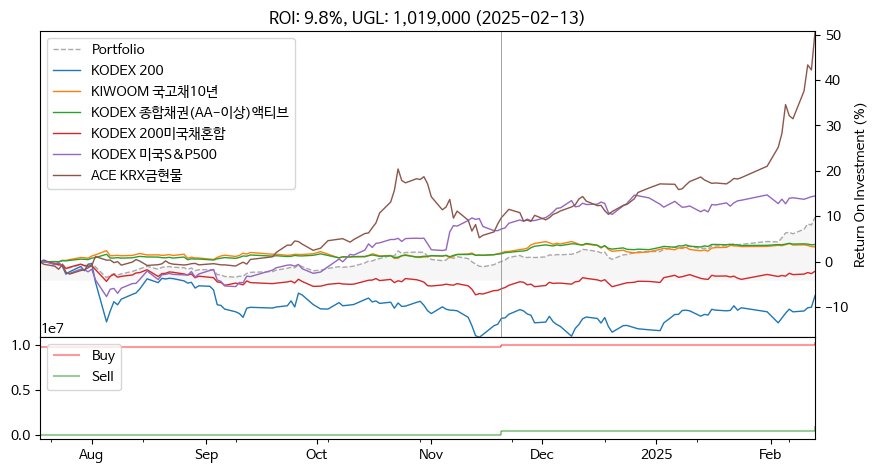

In [7]:
pf_wtr.plot(total=False)

In [8]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-02-13, 10365708, 942797, 10441830, 1018919, 0.09829710655555579


start    2024-07-18
end      2025-02-13
buy      10,365,708
sell        942,797
value    10,441,830
ugl       1,018,919
roi        0.098297
dtype: object

In [9]:
pf_wtr.valuate(total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
411060,ACE KRX금현물,2024-07-18,2025-02-13,"1,645,718","675,534","1,804,875","834,691",0.507189
379800,KODEX 미국S&P500,2024-07-18,2025-02-13,"1,667,165","150,269","1,758,705","241,808",0.145042
273130,KODEX 종합채권(AA-이상)액티브,2024-07-18,2025-02-13,"1,579,266",0.0,"1,639,750","60,484",0.038298
148070,KIWOOM 국고채10년,2024-07-18,2025-02-13,"1,783,567","116,995","1,725,450","58,878",0.033011
284430,KODEX 200미국채혼합,2024-07-18,2025-02-13,"1,790,670",0.0,"1,754,060","-36,610",-0.020445
069500,KODEX 200,2024-07-18,2025-02-13,"1,899,321",0.0,"1,758,990","-140,331",-0.073885


In [10]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [11]:
#pf_wtr.performance(metrics=METRICS)

In [12]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [13]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by Selected from 2025-02-13 to 2025-02-13
ERROR: check the date as no new transaction
ROI: 9.8%, UGL: 1,018,919 (2025-02-13)


name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32902            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14

## LIQ

In [76]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-01-03 loaded


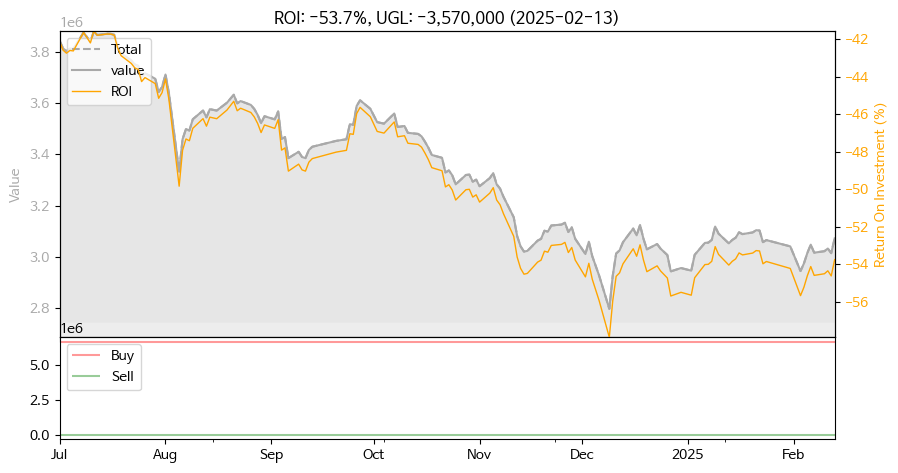

In [77]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [78]:
pf_liq.valuate()

start    2024-01-03
end      2025-02-13
buy       6,642,320
sell            0.0
value     3,072,366
ugl      -3,569,954
roi       -0.537456
dtype: object

In [73]:
pf_liq.view_record()

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-01-03 011780     금호석유  0.750877       342000  342000     NaN    0.051   
           066570     LG전자  0.812245       245000  245000     NaN    0.037   
           035890     서희건설  0.760000       298800  298800     NaN    0.045   
           040420  정상제이엘에스  0.875784       294890  294890     NaN    0.044   
           140520     대창스틸  0.803077       292500  292500     NaN    0.044   
           072990    에이치시티  0.542767       286200  286200     NaN    0.043   
           091580    상신이디피  0.918452       302400  302400     NaN    0.046   
           011200      HMM  0.755977       289850  289850     NaN    0.044   
           002220     한일철강  0.768371       297350  297350     NaN    0.045   
           006650     대한유화  0.832507       181500  181500     NaN    0.027   
           136490       선진  0.524409       292100  292100     NaN    0.044   
           064550    바이오니아  0.707956       297900  297900     NaN    0.045   
           460860     동국제강  0.599797       149784  149784     NaN    0.023   
           040910     아이씨디  0.741803       292800  292800     NaN    0.044   
           024950   삼천리자전거  0.675537       293100  293100     NaN    0.044   
           900070   글로벌에스엠  0.516667       299160  299160     NaN    0.045   
           036580      팜스코  0.523810       298410  298410     NaN    0.045   
           184230  SGA솔루션즈  0.589354       299820  299820     NaN    0.045   
           460850     동국씨엠  0.383273        90275   90275     NaN    0.014   
           016250  SGC E&C  0.409565       276000  276000     NaN    0.042   
           001230    동국홀딩스  0.354766        48088   48088     NaN    0.007   
           049470      SGA  0.528251       299935  299935     NaN    0.045   
           217820    원익피앤이  0.485701       275396  275396     NaN    0.041   
           109960   AP헬스케어  0.218206       598820  598820     NaN    0.090   

                       date*  
date       ticker             
2024-01-03 011780 2024-01-03  
           066570 2024-01-03  
           035890 2024-01-03  
           040420 2024-01-03  
           140520 2024-01-03  
           072990 2024-01-03  
           091580 2024-01-03  
           011200 2024-01-03  
           002220 2024-01-03  
           006650 2024-01-03  
           136490 2024-01-03  
           064550 2024-01-03  
           460860 2024-01-03  
           040910 2024-01-03  
           024950 2024-01-03  
           900070 2024-01-03  
           036580 2024-01-03  
           184230 2024-01-03  
           460850 2024-01-03  
           016250 2024-01-03  
           001230 2024-01-03  
           049470 2024-01-03  
           217820 2024-01-03  
           109960 2024-01-03

## TDF

In [16]:
kw_st = dict(
    method_select = 'selected'    
)

In [17]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, cost=file_cost)
pf_tdf.view_record()

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [18]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

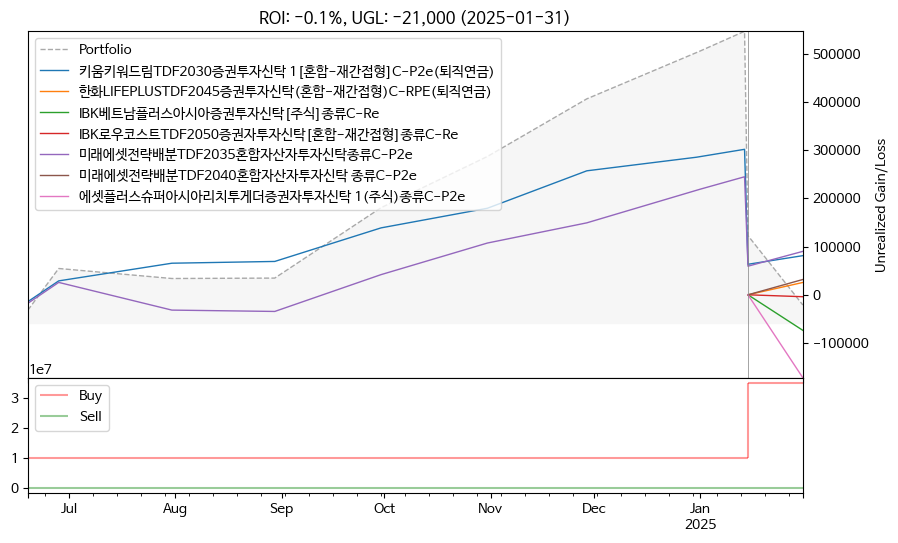

In [19]:
pf_tdf.plot(total=False, roi=False)

In [35]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)
#pf_tdf.valuate(date, total=False)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-01-31, 35000000, -31926, 35010787, -21139, -0.0006039576067228269


start    2024-06-19
end      2025-01-31
buy      35,000,000
sell        -31,926
value    35,010,787
ugl         -21,139
roi       -0.000604
dtype: object

In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [22]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record(-1)

7 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.1%, UGL: 395,347 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                             
2025-01-31 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55206C95800      -333329  5002379  0.1429    0.143 2025-01-31  
           K55213C50702       -23720  5001866  0.1429    0.143 2025-01-31  
           K55234BY9966        76676  5002979  0.1429    0.143 2025-01-31  
           K55234DF3150         5783  5001824  0.1429    0.143 2025-01-31  
           K55301BU6139      -294521  5001709  0.1429    0.143 2025-01-31  
           K55301BU6253       -30280  5001468  0.1429    0.143 2025-01-31  
           K55364CF7048       173532  5001523  0.1429    0.143 2025-01-31

## HANA

In [25]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [26]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [27]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

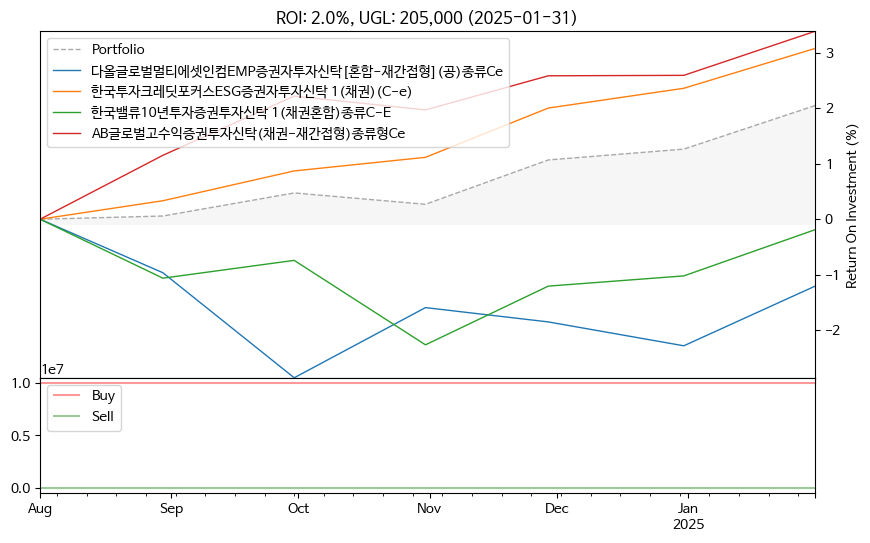

In [28]:
pf_hana.plot(total=False, roi=True)

In [29]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-01-31, 9990000, 0.0, 10194581, 204581, 0.0204785785785786


start    2024-08-01
end      2025-01-31
buy       9,990,000
sell            0.0
value    10,194,581
ugl         204,581
roi        0.020479
dtype: object

In [10]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-01-31 to 2025-01-31
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 0 %
ROI: 1.6%, UGL: 175,993 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-01-31 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-01-31 K55306CV9946       -81429   600255  0.0589    0.059 2025-01-31  
           KR5101888398       895986  6070462  0.5955    0.596 2025-01-31  
           KR5236AS4826      -391659  2023777  0.1986    0.199 2025-01-31  
           KR5370AP9956      -425610  1497373  0.1470    0.147 2025-01-31

# testing

In [36]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

In [37]:
path_data = 'data'
path_tran = 'transaction'

In [38]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

In [39]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-01-16 loaded


In [40]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-02-13, 42595050, 26775690, 16115000, 295640, 0.0069407016223725915


start    2024-07-22
end      2025-02-13
buy      42,595,050
sell     26,775,690
value    16,115,000
ugl         295,640
roi        0.006941
dtype: object

## testing

In [43]:
    def transaction_halt(self, date=None, save=False, **kw_halt):
        """
        create transaction with TradingHalts instance
        kw_halt: buy/sell/resume/halt
        """
        date = self._get_data(0, 0, date=date).index.max()
        recs = self.tradinghalts.transaction(date, date_format=self.date_format, **kw_halt) 
        if recs is not None: # new transaction created
            df_rec, record_halt = recs
            # update net with the new transaction
            record = self.record
            if record is not None:
                col_net, col_trs = [self.cols_record[x] for x in ['net', 'trs']]
                # get the date of new transaction
                date_lt = df_rec.index.get_level_values(0).max()
                # get value history with record before new transaction
                df_prc = self._update_universe(record, msg=True, download_missing=True)
                sr_val = self._calc_value_history(record, df_prc, end_date=date_lt, name=col_net, total=False)
                # get ticker list of no transaction
                tkrs = df_rec.loc[df_rec[col_trs]==0].loc[date_lt].index
                sr_val = sr_val.loc[date_lt:date_lt, tkrs]
                df_rec.update(sr_val)
            # save before recover
            self.df_rec = df_rec
            # recover record with halt before saving or converting to record with num of shares
            df_rec = self.tradinghalts.recover(df_rec, record_halt)
            if save:
                self.save_transaction(df_rec) # where self.record updated
            else:
                print('Set save=True to save transaction record')
            _ = self.valuate(total=True, int_to_str=True, print_summary_only=True)
            return df_rec
        else:
            return print('Nothing to save')

In [44]:
self = pf_mmt
transaction_halt(self, date=None, save=False)

Updated with transaction on 2025-02-13
Set save=True to save transaction record
ROI: 0.7%, UGL: 295,640 (2025-02-13)


name     ratio  transaction        net  weight  \
date       ticker                                                           
2024-07-22 000150            두산  0.972500    2600000.0  2600000.0   0.189   
           003230          삼양식품  0.995290    3185000.0  3185000.0   0.227   
           010120   LS ELECTRIC  0.986486    2664000.0  2664000.0   0.181   
           042700         한미반도체  0.975839    2980000.0  2980000.0   0.205   
           267260      HD현대일렉트릭  0.936306    2826000.0  2826000.0   0.198   
2024-08-22 000150            두산  0.998645   -1918800.0        0.0   0.000   
           003230          삼양식품  0.996071     509000.0  3054000.0   0.217   
           010120   LS ELECTRIC  0.980505   -2092800.0        0.0   0.000   
           012450     한화에어로스페이스  0.984071    2825000.0  2825000.0   0.206   
           042700         한미반도체  0.980504     123100.0  2585100.0   0.186   
           079550        LIG넥스원  0.982902    2702000.0  2702000.0   0.199   
           267260      HD현대일렉트릭  0.988994    -318000.0  2544000.0   0.192   
2024-09-26 003230          삼양식품  1.000000          0.0  3288000.0     NaN   
           012450     한화에어로스페이스  1.026549   -2825000.0        0.0     NaN   
           042700         한미반도체  1.000000          0.0  2398200.0     NaN   
           079550        LIG넥스원  1.000000          0.0  3024000.0     NaN   
           267260      HD현대일렉트릭  1.000000          0.0  2680000.0     NaN   
2024-09-27 003230          삼양식품  1.000000          0.0  3228000.0     NaN   
           012450     한화에어로스페이스  1.121774    2543292.0  2543292.0     NaN   
           042700         한미반도체  1.000000          0.0  2373000.0     NaN   
           079550        LIG넥스원  1.000000          0.0  2947000.0     NaN   
           267260      HD현대일렉트릭  1.000000          0.0  2556000.0     NaN   
           489790  한화인더스트리얼솔루션즈  1.000000     281709.0   281709.0     NaN   
2024-10-08 003230          삼양식품  1.000000          0.0  3144000.0   0.216   
           011790           SKC  1.001302    3072000.0  3072000.0   0.200   
           012450     한화에어로스페이스  1.000000          0.0  3280500.0   0.210   
           042700         한미반도체  0.993525   -2270100.0        0.0     NaN   
           079550        LIG넥스원  1.004107    -730500.0  2678500.0   0.192   
           267260      HD현대일렉트릭  1.000000          0.0  2568000.0   0.182   
           489790  한화인더스트리얼솔루션즈  1.035578    -354150.0        0.0     NaN   
2024-11-11 003230          삼양식품  0.998224    -563000.0  2815000.0   0.200   
           011790           SKC  0.995538   -2442900.0        0.0     NaN   
           012450     한화에어로스페이스  1.030979    -807000.0  2824500.0   0.200   
           064350          현대로템  1.012638    3038400.0  3038400.0   0.200   
           079550        LIG넥스원  1.000000          0.0  2926000.0   0.200   
           267260      HD현대일렉트릭  1.000000          0.0  3120000.0   0.200   
2024-12-16 000150            두산  0.963303    2725000.0  2725000.0   0.200   
           003230          삼양식품  1.000000   -1458000.0  2187000.0   0.200   
           010130          고려아연  1.000858    2330000.0  2330000.0   0.200   
           012450     한화에어로스페이스  1.040650   -2152501.0        0.0   0.000   
           064350          현대로템  1.026943   -2316000.0        0.0   0.000   
           079550        LIG넥스원  1.004130   -2130700.0        0.0   0.000   
           267260      HD현대일렉트릭  0.975610    -389500.0  2726500.0   0.200   
           298040         효성중공업  0.985808    2290000.0  2290000.0   0.200   
2025-01-16 000150            두산  1.000000          0.0  2880000.0   0.200   
           003230          삼양식품  1.000000          0.0  2310000.0   0.200   
           010120   LS ELECTRIC  0.899535    3225000.0  3225000.0   0.200   
           010130          고려아연  0.957796   -1706000.0        0.0   0.000   
           012450     한화에어로스페이스  1.031414    2673999.0  2674000.0   0.200   
           267260      HD현대일렉트릭  1.000000          0.0  2922500.0   0.200   
           298040      

In [31]:
res = transaction_halt(self, date=None, save=False)
sr_val, df_rec = res

Updated with transaction on 2025-02-13


In [32]:
sr_val

date        ticker
2025-02-13  000150    3300000
            003230    2409000
            010120    3945000
            012450    3612000
            267260    2849000
Name: net, dtype: int64

In [33]:
df_rec

name     ratio  transaction        net  weight  \
date       ticker                                                           
2024-07-22 000150            두산  0.972500    2600000.0  2600000.0   0.189   
           003230          삼양식품  0.995290    3185000.0  3185000.0   0.227   
           010120   LS ELECTRIC  0.986486    2664000.0  2664000.0   0.181   
           042700         한미반도체  0.975839    2980000.0  2980000.0   0.205   
           267260      HD현대일렉트릭  0.936306    2826000.0  2826000.0   0.198   
2024-08-22 000150            두산  0.998645   -1918800.0        0.0   0.000   
           003230          삼양식품  0.996071     509000.0  3054000.0   0.217   
           010120   LS ELECTRIC  0.980505   -2092800.0        0.0   0.000   
           012450     한화에어로스페이스  0.984071    2825000.0  2825000.0   0.206   
           042700         한미반도체  0.980504     123100.0  2585100.0   0.186   
           079550        LIG넥스원  0.982902    2702000.0  2702000.0   0.199   
           267260      HD현대일렉트릭  0.988994    -318000.0  2544000.0   0.192   
2024-09-26 003230          삼양식품  1.000000          0.0  3288000.0     NaN   
           012450     한화에어로스페이스  1.026549   -2825000.0        0.0     NaN   
           042700         한미반도체  1.000000          0.0  2398200.0     NaN   
           079550        LIG넥스원  1.000000          0.0  3024000.0     NaN   
           267260      HD현대일렉트릭  1.000000          0.0  2680000.0     NaN   
2024-09-27 003230          삼양식품  1.000000          0.0  3228000.0     NaN   
           012450     한화에어로스페이스  1.121774    2543292.0  2543292.0     NaN   
           042700         한미반도체  1.000000          0.0  2373000.0     NaN   
           079550        LIG넥스원  1.000000          0.0  2947000.0     NaN   
           267260      HD현대일렉트릭  1.000000          0.0  2556000.0     NaN   
           489790  한화인더스트리얼솔루션즈  1.000000     281709.0   281709.0     NaN   
2024-10-08 003230          삼양식품  1.000000          0.0  3144000.0   0.216   
           011790           SKC  1.001302    3072000.0  3072000.0   0.200   
           012450     한화에어로스페이스  1.000000          0.0  3280500.0   0.210   
           042700         한미반도체  0.993525   -2270100.0        0.0     NaN   
           079550        LIG넥스원  1.004107    -730500.0  2678500.0   0.192   
           267260      HD현대일렉트릭  1.000000          0.0  2568000.0   0.182   
           489790  한화인더스트리얼솔루션즈  1.035578    -354150.0        0.0     NaN   
2024-11-11 003230          삼양식품  0.998224    -563000.0  2815000.0   0.200   
           011790           SKC  0.995538   -2442900.0        0.0     NaN   
           012450     한화에어로스페이스  1.030979    -807000.0  2824500.0   0.200   
           064350          현대로템  1.012638    3038400.0  3038400.0   0.200   
           079550        LIG넥스원  1.000000          0.0  2926000.0   0.200   
           267260      HD현대일렉트릭  1.000000          0.0  3120000.0   0.200   
2024-12-16 000150            두산  0.963303    2725000.0  2725000.0   0.200   
           003230          삼양식품  1.000000   -1458000.0  2187000.0   0.200   
           010130          고려아연  1.000858    2330000.0  2330000.0   0.200   
           012450     한화에어로스페이스  1.040650   -2152501.0        0.0   0.000   
           064350          현대로템  1.026943   -2316000.0        0.0   0.000   
           079550        LIG넥스원  1.004130   -2130700.0        0.0   0.000   
           267260      HD현대일렉트릭  0.975610    -389500.0  2726500.0   0.200   
           298040         효성중공업  0.985808    2290000.0  2290000.0   0.200   
2025-01-16 000150            두산  1.000000          0.0  2880000.0   0.200   
           003230          삼양식품  1.000000          0.0  2310000.0   0.200   
           010120   LS ELECTRIC  0.899535    3225000.0  3225000.0   0.200   
           010130          고려아연  0.957796   -1706000.0        0.0   0.000   
           012450     한화에어로스페이스  1.031414    2673999.0  2674000.0   0.200   
           267260      HD현대일렉트릭  1.000000          0.0  2922500.0   0.200   
           298040      

In [29]:
col_trs = 'transaction'
#sr = df_rec.loc['2025-02-13', col_trs]
#tkrs = sr.loc[sr>0].index
date_lt = '2025-02-13'
tkrs = df_rec.loc[df_rec[col_trs]==0].loc[date_lt].index
tkrs

Index(['000150', '003230', '010120', '012450', '267260'], dtype='object', name='ticker')

In [22]:
self = pf_mmt

record = self.record
if record is None:
    pass #return None
df_prices = self._update_universe(record, msg=True, download_missing=True)
sr_val = self._calc_value_history(record, df_prices, name=self.name, total=False)
sr_val.loc['2025-02-13']

ticker
000150    3300000
003230    2409000
010120    3945000
010130          0
012450    3612000
267260    2849000
298040          0
Name: MMT_2407, dtype: int64

In [57]:
self = pf_mmt
df_rec = self.df_rec
res = transaction_halt(self)
res[0]

Updated with transaction on 2025-02-13


name     ratio  transaction        net  weight  \
date       ticker                                                           
2024-07-22 000150            두산  0.972500    2600000.0  2600000.0   0.189   
           003230          삼양식품  0.995290    3185000.0  3185000.0   0.227   
           010120   LS ELECTRIC  0.986486    2664000.0  2664000.0   0.181   
           042700         한미반도체  0.975839    2980000.0  2980000.0   0.205   
           267260      HD현대일렉트릭  0.936306    2826000.0  2826000.0   0.198   
2024-08-22 000150            두산  0.998645   -1918800.0        0.0   0.000   
           003230          삼양식품  0.996071     509000.0  3054000.0   0.217   
           010120   LS ELECTRIC  0.980505   -2092800.0        0.0   0.000   
           012450     한화에어로스페이스  0.984071    2825000.0  2825000.0   0.206   
           042700         한미반도체  0.980504     123100.0  2585100.0   0.186   
           079550        LIG넥스원  0.982902    2702000.0  2702000.0   0.199   
           267260      HD현대일렉트릭  0.988994    -318000.0  2544000.0   0.192   
2024-09-26 003230          삼양식품  1.000000          0.0  3288000.0     NaN   
           012450     한화에어로스페이스  1.026549   -2825000.0        0.0     NaN   
           042700         한미반도체  1.000000          0.0  2398200.0     NaN   
           079550        LIG넥스원  1.000000          0.0  3024000.0     NaN   
           267260      HD현대일렉트릭  1.000000          0.0  2680000.0     NaN   
2024-09-27 003230          삼양식품  1.000000          0.0  3228000.0     NaN   
           012450     한화에어로스페이스  1.121774    2543292.0  2543292.0     NaN   
           042700         한미반도체  1.000000          0.0  2373000.0     NaN   
           079550        LIG넥스원  1.000000          0.0  2947000.0     NaN   
           267260      HD현대일렉트릭  1.000000          0.0  2556000.0     NaN   
           489790  한화인더스트리얼솔루션즈  1.000000     281709.0   281709.0     NaN   
2024-10-08 003230          삼양식품  1.000000          0.0  3144000.0   0.216   
           011790           SKC  1.001302    3072000.0  3072000.0   0.200   
           012450     한화에어로스페이스  1.000000          0.0  3280500.0   0.210   
           042700         한미반도체  0.993525   -2270100.0        0.0     NaN   
           079550        LIG넥스원  1.004107    -730500.0  2678500.0   0.192   
           267260      HD현대일렉트릭  1.000000          0.0  2568000.0   0.182   
           489790  한화인더스트리얼솔루션즈  1.035578    -354150.0        0.0     NaN   
2024-11-11 003230          삼양식품  0.998224    -563000.0  2815000.0   0.200   
           011790           SKC  0.995538   -2442900.0        0.0     NaN   
           012450     한화에어로스페이스  1.030979    -807000.0  2824500.0   0.200   
           064350          현대로템  1.012638    3038400.0  3038400.0   0.200   
           079550        LIG넥스원  1.000000          0.0  2926000.0   0.200   
           267260      HD현대일렉트릭  1.000000          0.0  3120000.0   0.200   
2024-12-16 000150            두산  0.963303    2725000.0  2725000.0   0.200   
           003230          삼양식품  1.000000   -1458000.0  2187000.0   0.200   
           010130          고려아연  1.000858    2330000.0  2330000.0   0.200   
           012450     한화에어로스페이스  1.040650   -2152501.0        0.0   0.000   
           064350          현대로템  1.026943   -2316000.0        0.0   0.000   
           079550        LIG넥스원  1.004130   -2130700.0        0.0   0.000   
           267260      HD현대일렉트릭  0.975610    -389500.0  2726500.0   0.200   
           298040         효성중공업  0.985808    2290000.0  2290000.0   0.200   
2025-01-16 000150            두산  1.000000          0.0  2880000.0   0.200   
           003230          삼양식품  1.000000          0.0  2310000.0   0.200   
           010120   LS ELECTRIC  0.899535    3225000.0  3225000.0   0.200   
           010130          고려아연  0.957796   -1706000.0        0.0   0.000   
           012450     한화에어로스페이스  1.031414    2673999.0  2674000.0   0.200   
           267260      HD현대일렉트릭  1.000000          0.0  2922500.0   0.200   
           298040      

In [92]:
kw = dict(
#    sell = {'000150': 3000000},
    date = None,
    save = False,
)
_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-02-13
Set save=True to save transaction record
ROI: -4.2%, UGL: -1,807,860 (2025-02-13)


In [93]:
pf_mmt.view_record(-2)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2025-01-16 000150           두산  1.000000            0  2880000     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           010120  LS ELECTRIC  0.899535      3225000  3225000     0.2   
           010130         고려아연  0.957796     -1706000        0     0.0   
           012450    한화에어로스페이스  1.031414      2673999  2674000     0.2   
           267260     HD현대일렉트릭  1.000000            0  2922500     0.2   
           298040        효성중공업  0.997872     -2350000        0     0.0   
2025-02-13 000150           두산  1.000000            0  2880000     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           010120  LS ELECTRIC  1.000000            0  3225000     0.2   
           012450    한화에어로스페이스  1.000000            0  2674000     0.2   
           267260     HD현대일렉트릭  1.000000            0  2922500     0.2   

                   weight*      date*  
date       ticker                      
2025-01-16 000150    0.206 2025-01-17  
           003230    0.165 2025-01-17  
           010120    0.230 2025-01-17  
           010130    0.000 2025-01-17  
           012450    0.191 2025-01-17  
           267260    0.209 2025-01-17  
           298040    0.000 2025-01-17  
2025-02-13 000150    0.206 2025-02-13  
           003230    0.165 2025-02-13  
           010120    0.230 2025-02-13  
           012450    0.191 2025-02-13  
           267260    0.209 2025-02-13

In [54]:
kw = dict(
    nshares = True,
    date = None,
    save = False,
    capital = 0,
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-02-06 to 2025-02-06
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
ROI: 0.6%, UGL: 286,815 (2025-02-13)
Set save=True to save transaction record


In [94]:
self = pf_mmt
df_rec = self.df_rec
df_prices = self._update_universe(df_rec, download_missing=True)
date = None
total=False
sr_val = self._calc_value_history(df_rec, df_prices, date, self.name, msg=False, total=total)

In [95]:
self = pf_mmt
df_rec = self.df_rec
date = '2025-02-13'
tkrs = df_rec.loc[df_rec['transaction']==0].loc[date].index

In [96]:
sr_val.loc[date:date].rename('net')

date        ticker
2025-02-13  000150    2880000
            003230    2310000
            010120    3225000
            012450    2674000
            267260    2922500
Name: net, dtype: int64

In [98]:
sr_val.loc['2025-02-10':]

date        ticker
2025-02-10  000150    2985000
            003230    2394000
            010120    3127500
            012450    2891000
            267260    2649500
            010130          0
            298040          0
2025-02-11  000150    2965000
            003230    2445000
            010120    3195000
            012450    3486000
            267260    2702000
            010130          0
            298040          0
2025-02-12  000150    3130000
            003230    2469000
            010120    3577500
            012450    3640000
            267260    2789500
            010130          0
            298040          0
2025-02-13  000150    2880000
            003230    2310000
            010120    3225000
            012450    2674000
            267260    2922500
Name: MMT_2407, dtype: int64

In [90]:
df_rec.update(sr_val.loc[date:date])

In [91]:
df_rec

name     ratio  transaction        net  weight  \
date       ticker                                                           
2024-07-22 000150            두산  0.972500    2600000.0  2600000.0   0.189   
           003230          삼양식품  0.995290    3185000.0  3185000.0   0.227   
           010120   LS ELECTRIC  0.986486    2664000.0  2664000.0   0.181   
           042700         한미반도체  0.975839    2980000.0  2980000.0   0.205   
           267260      HD현대일렉트릭  0.936306    2826000.0  2826000.0   0.198   
2024-08-22 000150            두산  0.998645   -1918800.0        0.0   0.000   
           003230          삼양식품  0.996071     509000.0  3054000.0   0.217   
           010120   LS ELECTRIC  0.980505   -2092800.0        0.0   0.000   
           012450     한화에어로스페이스  0.984071    2825000.0  2825000.0   0.206   
           042700         한미반도체  0.980504     123100.0  2585100.0   0.186   
           079550        LIG넥스원  0.982902    2702000.0  2702000.0   0.199   
           267260      HD현대일렉트릭  0.988994    -318000.0  2544000.0   0.192   
2024-09-26 003230          삼양식품  1.000000          0.0  3288000.0     NaN   
           012450     한화에어로스페이스  1.026549   -2825000.0        0.0     NaN   
           042700         한미반도체  1.000000          0.0  2398200.0     NaN   
           079550        LIG넥스원  1.000000          0.0  3024000.0     NaN   
           267260      HD현대일렉트릭  1.000000          0.0  2680000.0     NaN   
2024-09-27 003230          삼양식품  1.000000          0.0  3228000.0     NaN   
           012450     한화에어로스페이스  1.121774    2543292.0  2543292.0     NaN   
           042700         한미반도체  1.000000          0.0  2373000.0     NaN   
           079550        LIG넥스원  1.000000          0.0  2947000.0     NaN   
           267260      HD현대일렉트릭  1.000000          0.0  2556000.0     NaN   
           489790  한화인더스트리얼솔루션즈  1.000000     281709.0   281709.0     NaN   
2024-10-08 003230          삼양식품  1.000000          0.0  3144000.0   0.216   
           011790           SKC  1.001302    3072000.0  3072000.0   0.200   
           012450     한화에어로스페이스  1.000000          0.0  3280500.0   0.210   
           042700         한미반도체  0.993525   -2270100.0        0.0     NaN   
           079550        LIG넥스원  1.004107    -730500.0  2678500.0   0.192   
           267260      HD현대일렉트릭  1.000000          0.0  2568000.0   0.182   
           489790  한화인더스트리얼솔루션즈  1.035578    -354150.0        0.0     NaN   
2024-11-11 003230          삼양식품  0.998224    -563000.0  2815000.0   0.200   
           011790           SKC  0.995538   -2442900.0        0.0     NaN   
           012450     한화에어로스페이스  1.030979    -807000.0  2824500.0   0.200   
           064350          현대로템  1.012638    3038400.0  3038400.0   0.200   
           079550        LIG넥스원  1.000000          0.0  2926000.0   0.200   
           267260      HD현대일렉트릭  1.000000          0.0  3120000.0   0.200   
2024-12-16 000150            두산  0.963303    2725000.0  2725000.0   0.200   
           003230          삼양식품  1.000000   -1458000.0  2187000.0   0.200   
           010130          고려아연  1.000858    2330000.0  2330000.0   0.200   
           012450     한화에어로스페이스  1.040650   -2152501.0        0.0   0.000   
           064350          현대로템  1.026943   -2316000.0        0.0   0.000   
           079550        LIG넥스원  1.004130   -2130700.0        0.0   0.000   
           267260      HD현대일렉트릭  0.975610    -389500.0  2726500.0   0.200   
           298040         효성중공업  0.985808    2290000.0  2290000.0   0.200   
2025-01-16 000150            두산  1.000000          0.0  2880000.0   0.200   
           003230          삼양식품  1.000000          0.0  2310000.0   0.200   
           010120   LS ELECTRIC  0.899535    3225000.0  3225000.0   0.200   
           010130          고려아연  0.957796   -1706000.0        0.0   0.000   
           012450     한화에어로스페이스  1.031414    2673999.0  2674000.0   0.200   
           267260      HD현대일렉트릭  1.000000          0.0  2922500.0   0.200   
           298040      

# testing

In [9]:
def update_record(self, security_names=None, save=True, update_var=True):
    """
    update amount-based & ticker names with the saved record
    save: overwrite record file if True
    """
    # reload record w/ full transaction history first
    record = self.import_record(halt=False, msg=False)
    if record is None:
        return None
    else:
        df_rec = record.copy()

    # update col_rat and convert record from num of shares to amount
    df_prc = self._update_universe(df_rec, msg=False)
    return df_rec, df_prc
    df_rec = self._update_price_ratio(df_rec, df_prc)
    df_rec = self._convert_to_amount(df_rec, df_prc)
    
    # update ticker name
    df_rec = self._update_ticker_name(df_rec, security_names)
    # save or remind        
    if not df_rec.equals(record): # change exists
        if save:
            self._overwrite_record(df_rec, update_var=update_var)
        else:
            print('REMINDER: Set save to True to save update')                
    #return df_rec
    return None

In [10]:
self = pf_wtr
df_rec, df_prc = update_record(self)

In [20]:
#def _update_price_ratio(self, df_rec, df_universe):
df_universe = df_prc
"""
calc the ratio of trading price to close price on the trading date
"""
col_rat, col_prc = [self.cols_record[x] for x in ['rat','prc']]
col_close = 'close'
# check if record is nshares mode where price col cannot be None
if df_rec[col_prc].isna().any(): # no update if missing price
    if df_rec[col_prc].notna().any():
        print(f'ERROR: {col_prc} must be all None or all not None')
    #return df_rec

df_rat = df_rec.loc[df_rec[col_rat].isna()]
if len(df_rat) == 0: # no calc of ratio
    pass #return df_rec

col_date, col_tkr = 'date', 'ticker'
sr_close = df_universe.stack().rename(col_close).rename_axis([col_date, col_tkr])

In [21]:
df_rat

name  ratio  transaction    net  weight  \
date       ticker                                                            
2025-02-13 069500             KODEX 200    NaN     1.526276   51.0  0.1667   
           148070         KIWOOM 국고채10년    NaN     1.539882   15.0  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브    NaN     0.000000   14.0  0.1667   
           284430        KODEX 200미국채혼합    NaN     5.000000  134.0  0.1667   
           379800        KODEX 미국S&P500    NaN     1.000000   87.0  0.1667   
           411060            ACE KRX금현물    NaN   -21.000000   75.0  0.1667   

                       date*     price  
date       ticker                       
2025-02-13 069500 2025-02-14   34490.0  
           148070 2025-02-14  115030.0  
           273130 2025-02-14  117125.0  
           284430 2025-02-14   13090.0  
           379800 2025-02-14   20215.0  
           411060 2025-02-14   24065.0

In [22]:
sr_close

date        ticker
2022-01-03  069500     37315
            379800     12585
            273130    107985
            411060     10255
            148070    110117
                       ...  
2025-02-13  379800     20060
            273130    117125
            411060     23100
            148070    114725
            284430     13030
Name: close, Length: 4572, dtype: int64

In [23]:
df_rat = df_rat.join(sr_close).apply(lambda x: x[col_close] / x[col_prc], axis=1)
df_rec.update(df_rat.rename(col_rat))
#return df_rec

In [24]:
df_rec

name     ratio  transaction         net  \
date       ticker                                                            
2024-07-18 069500             KODEX 200  1.016119    42.450737   42.450737   
           148070          KOSEF 국고채10년  1.001482    14.495504   14.495504   
           273130  KODEX 종합채권(AA-이상)액티브  1.000842    14.000000   14.000000   
           284430        KODEX 200미국채혼합  1.002611   124.000000  124.000000   
           379800      KODEX 미국S&P500TR  1.005993    94.000000   94.000000   
           411060            ACE KRX금현물  1.012238   106.000000  106.000000   
2024-11-20 069500             KODEX 200  1.000000     7.022977   49.160841   
           148070          KOSEF 국고채10년  0.999744    -1.035388   13.460038   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000     0.000000   14.000000   
           284430        KODEX 200미국채혼합  0.999603     5.000000  129.000000   
           379800      KODEX 미국S&P500TR  1.001064    -8.000000   86.000000   
           411060            ACE KRX금현물  1.004401   -10.000000   96.000000   
2025-02-13 069500             KODEX 200  0.991447     1.526276   51.000000   
           148070         KIWOOM 국고채10년  0.997349     1.539882   15.000000   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000     0.000000   14.000000   
           284430        KODEX 200미국채혼합  0.995416     5.000000  134.000000   
           379800        KODEX 미국S&P500  0.992332     1.000000   87.000000   
           411060            ACE KRX금현물  0.959900   -21.000000   75.000000   

                   weight      date*          price  
date       ticker                                    
2024-07-18 069500  0.1670 2024-07-18   38056.583088  
           148070  0.1670 2024-07-18  110817.811157  
           273130  0.1670 2024-07-18  112800.000000  
           284430  0.1670 2024-07-18   13405.000000  
           379800  0.1670 2024-07-18   17520.000000  
           411060  0.1670 2024-07-18   15525.000000  
2024-11-20 069500  0.1670 2024-11-20   32902.000000  
           148070  0.1670 2024-11-20  113034.974659  
           273130  0.1670 2024-11-20  114815.000000  
           284430  0.1670 2024-11-20   12585.000000  
           379800  0.1670 2024-11-20   18790.000000  
           411060  0.1670 2024-11-20   17040.000000  
2025-02-13 069500  0.1667 2025-02-14   34490.000000  
           148070  0.1667 2025-02-14  115030.000000  
           273130  0.1667 2025-02-14  117125.000000  
           284430  0.1667 2025-02-14   13090.000000  
           379800  0.1667 2025-02-14   20215.000000  
           411060  0.1667 2025-02-14   24065.000000